# Problema del caballo en Python 

Por: Rojas Santos Rogelio

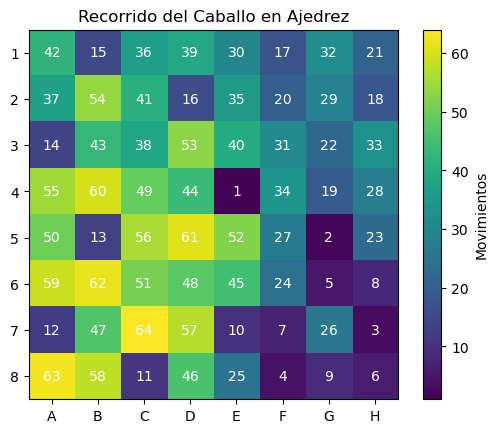

In [5]:
import matplotlib.pyplot as plt
import numpy as np

# Movimientos posibles del caballo en el tablero de ajedrez
movimientos = [(2, 1), (1, 2), (-1, 2), (-2, 1), (-2, -1), (-1, -2), (1, -2), (2, -1)]

# Función para verificar si un movimiento es válido
def es_valido(x, y, tablero):
    # Un movimiento es válido si la casilla está dentro del tablero y no ha sido visitada antes
    return 0 <= x < 8 and 0 <= y < 8 and tablero[x][y] == -1

# Función para contar los movimientos válidos desde una casilla
def contar_movimientos(x, y, tablero):
    count = 0
    for dx, dy in movimientos:
        nuevo_x, nuevo_y = x + dx, y + dy
        if es_valido(nuevo_x, nuevo_y, tablero):
            count += 1
    return count

# Función para resolver el problema del caballo
def resolver_problema(tablero, mov, x, y, pos):
    # Marcar la casilla actual como visitada
    tablero[x][y] = pos
    # Si hemos visitado todas las casillas, hemos resuelto el problema
    if pos == 64:
        return True

    # Aplicar la heurística de Warnsdorff: priorizar los movimientos que llevan a casillas con menos movimientos válidos
    candidatos = []
    for dx, dy in movimientos:
        nuevo_x, nuevo_y = x + dx, y + dy
        if es_valido(nuevo_x, nuevo_y, tablero):
            candidatos.append((nuevo_x, nuevo_y, contar_movimientos(nuevo_x, nuevo_y, tablero)))
    candidatos.sort(key=lambda x: x[2])

    # Intentar cada movimiento válido
    for nuevo_x, nuevo_y, _ in candidatos:
        if resolver_problema(tablero, mov, nuevo_x, nuevo_y, pos + 1):
            return True

    # Si no encontramos una solución, deshacer el movimiento (backtracking) y probar otro camino
    tablero[x][y] = -1
    return False

# Función para visualizar el tablero
def visualizar_tablero(tablero):
    fig, ax = plt.subplots()
    img = ax.imshow(tablero, cmap='viridis')  # Crear una imagen del tablero
    for i in range(8):
        for j in range(8):
            ax.text(j, i, tablero[i][j], ha='center', va='center', color='w')  # Agregar el número de movimiento a cada casilla
    plt.colorbar(img, label='Movimientos')  # Agregar una barra de colores para indicar el número de movimiento
    plt.xticks(np.arange(8), ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H'])  # Etiquetas para las columnas
    plt.yticks(np.arange(8), ['1', '2', '3', '4', '5', '6', '7', '8'])  # Etiquetas para las filas
    plt.title('Recorrido del Caballo en Ajedrez')  # Título del gráfico
    plt.show()  # Mostrar el gráfico

# Función principal
def main():
    tablero = [[-1 for _ in range(8)] for _ in range(8)]  # Inicializar el tablero con -1, indicando que ninguna casilla ha sido visitada
    resolver_problema(tablero, movimientos, 3, 4, 1)  # Cambia la posición inicial aquí ("0,0", "4,4", "3,3", "3,6", "7,7", etc)
    visualizar_tablero(tablero)  # Visualizar el tablero

if __name__ == "__main__":
    main()  # Ejecutar la función principal


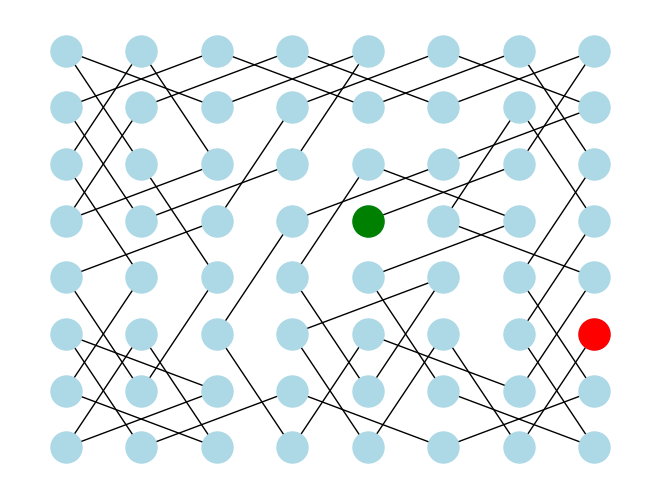

In [6]:
# VERSION GRAFO

import matplotlib.pyplot as plt
import networkx as nx

# Movimientos posibles del caballo
movimientos = [(2, 1), (1, 2), (-1, 2), (-2, 1), (-2, -1), (-1, -2), (1, -2), (2, -1)]

def es_valido(x, y, tablero):
    return 0 <= x < 8 and 0 <= y < 8 and tablero[x][y] == -1

def contar_movimientos(x, y, tablero):
    count = 0
    for dx, dy in movimientos:
        nuevo_x, nuevo_y = x + dx, y + dy
        if es_valido(nuevo_x, nuevo_y, tablero):
            count += 1
    return count

def resolver_problema(tablero, mov, x, y, pos, camino):
    tablero[x][y] = pos
    camino.append((x, y))
    if pos == 64:
        return True

    # Aplicar la heurística de Warnsdorff
    candidatos = []
    for dx, dy in movimientos:
        nuevo_x, nuevo_y = x + dx, y + dy
        if es_valido(nuevo_x, nuevo_y, tablero):
            candidatos.append((nuevo_x, nuevo_y, contar_movimientos(nuevo_x, nuevo_y, tablero)))
    candidatos.sort(key=lambda x: x[2])

    for nuevo_x, nuevo_y, _ in candidatos:
        if resolver_problema(tablero, mov, nuevo_x, nuevo_y, pos + 1, camino):
            return True

    tablero[x][y] = -1
    camino.pop()
    return False

def visualizar_grafo(camino):
    G = nx.Graph()
    # Crear las aristas del camino
    aristas = [(camino[i-1], camino[i]) for i in range(1, len(camino))]
    G.add_edges_from(aristas)  # Agregar las aristas al grafo
    pos = {node: node for node in G.nodes()}
    nx.draw(G, pos, with_labels=False, node_color='lightblue', node_size=500)
    
    # Dibujar la casilla de inicio y fin con un color diferente
    nx.draw_networkx_nodes(G, pos, nodelist=[camino[0]], node_color='green', node_size=500)
    nx.draw_networkx_nodes(G, pos, nodelist=[camino[-1]], node_color='red', node_size=500)
    
    plt.show()

def main():
    tablero = [[-1 for _ in range(8)] for _ in range(8)]
    camino = []
    resolver_problema(tablero, movimientos, 4, 4, 1, camino)  # Cambia la posición inicial aquí
    visualizar_grafo(camino)

if __name__ == "__main__":
    main()
